In [1]:
import dask
import dask.threaded
import dask.multiprocessing
from dask.distributed import Client

c = Client()
c

/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/distributed/bokeh/core.py:74: UserWarning: 
Failed to start diagnostics server on port 8787. [Errno 13] Permission denied
  warnings.warn("\n" + msg)


<Client: scheduler='tcp://127.0.0.1:34215' processes=8 cores=48>

In [2]:
import sys
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean
import glob

%matplotlib inline


/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/xarray/core/merge.py:16: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [3]:
#params

tous_les_plots_gridT=True
tous_les_plots_flxT=True

In [4]:
config='EU36'
case='MPC001'
freq='1d'
year='2010'

datadir='/scratch/cnt0024/hmg2840/colombo/'+str(config)+'/'+str(config)+'-'+str(case)+'-S/'+str(freq)+'/'+str(year)+'/'
#!ls $datadir
gridfile='/scratch/cnt0024/hmg2840/colombo/EU36/EU36-I/coordinates_EU36.nc'
maskfile='/scratch/cnt0024/hmg2840/colombo/EU36/EU36-I/EU36.L75_mesh_mask.nc'

In [5]:
dsgrid=xr.open_dataset(gridfile)
dsmask=xr.open_dataset(maskfile)

In [6]:
#def compute_EKE(u,v):
#    return eke
def compute_mxl(tem,sal):
    return mxl
#def compute_curr(u,v):
#    return psi
#def compute_psi(u,v):
#    return psi


In [7]:
month_name={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
def plot_monthly(var,mask,vmin,vmax,cmap,title,figfile):
    fig, axes = plt.subplots(3,4,figsize=(30,20))
    axes = axes.ravel()
    for m in np.arange(1,13):
        if m < 10:
            month='0'+str(m)
        else:
            month=str(m)
        if m in [1,3,5,7,8,10,12]:
            dayf='31'
        elif m == 2:
            dayf='28'
        else:
            dayf='30'
        ax=axes[m-1]
        var.sel(time_counter=slice('2010-'+month+'-01','2010-'+month+'-'+dayf)).mean(dim='time_counter').where(mask==1).plot(cmap=cmap,ax=ax,vmin=vmin,vmax=vmax,add_labels=True)
        ax.set_title(month_name[m])
    fig.suptitle('Monthly mean of '+str(title))
    plt.savefig(config+'-'+case+'-new_y'+str(year)+'.1m_'+figfile+'.png')

distributed.nanny - WARNING - Worker process 5638 was killed by signal 11
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker process 5643 was killed by signal 6
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker process 5634 was killed by signal 6
distributed.nanny - WARNING - Worker process 5645 was killed by signal 6
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker process 5641 was killed by signal 11
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker process 11074 was killed by signal 6
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker process 10011 was killed by signal 11
distributed.nanny - WARNING - Restarting worker


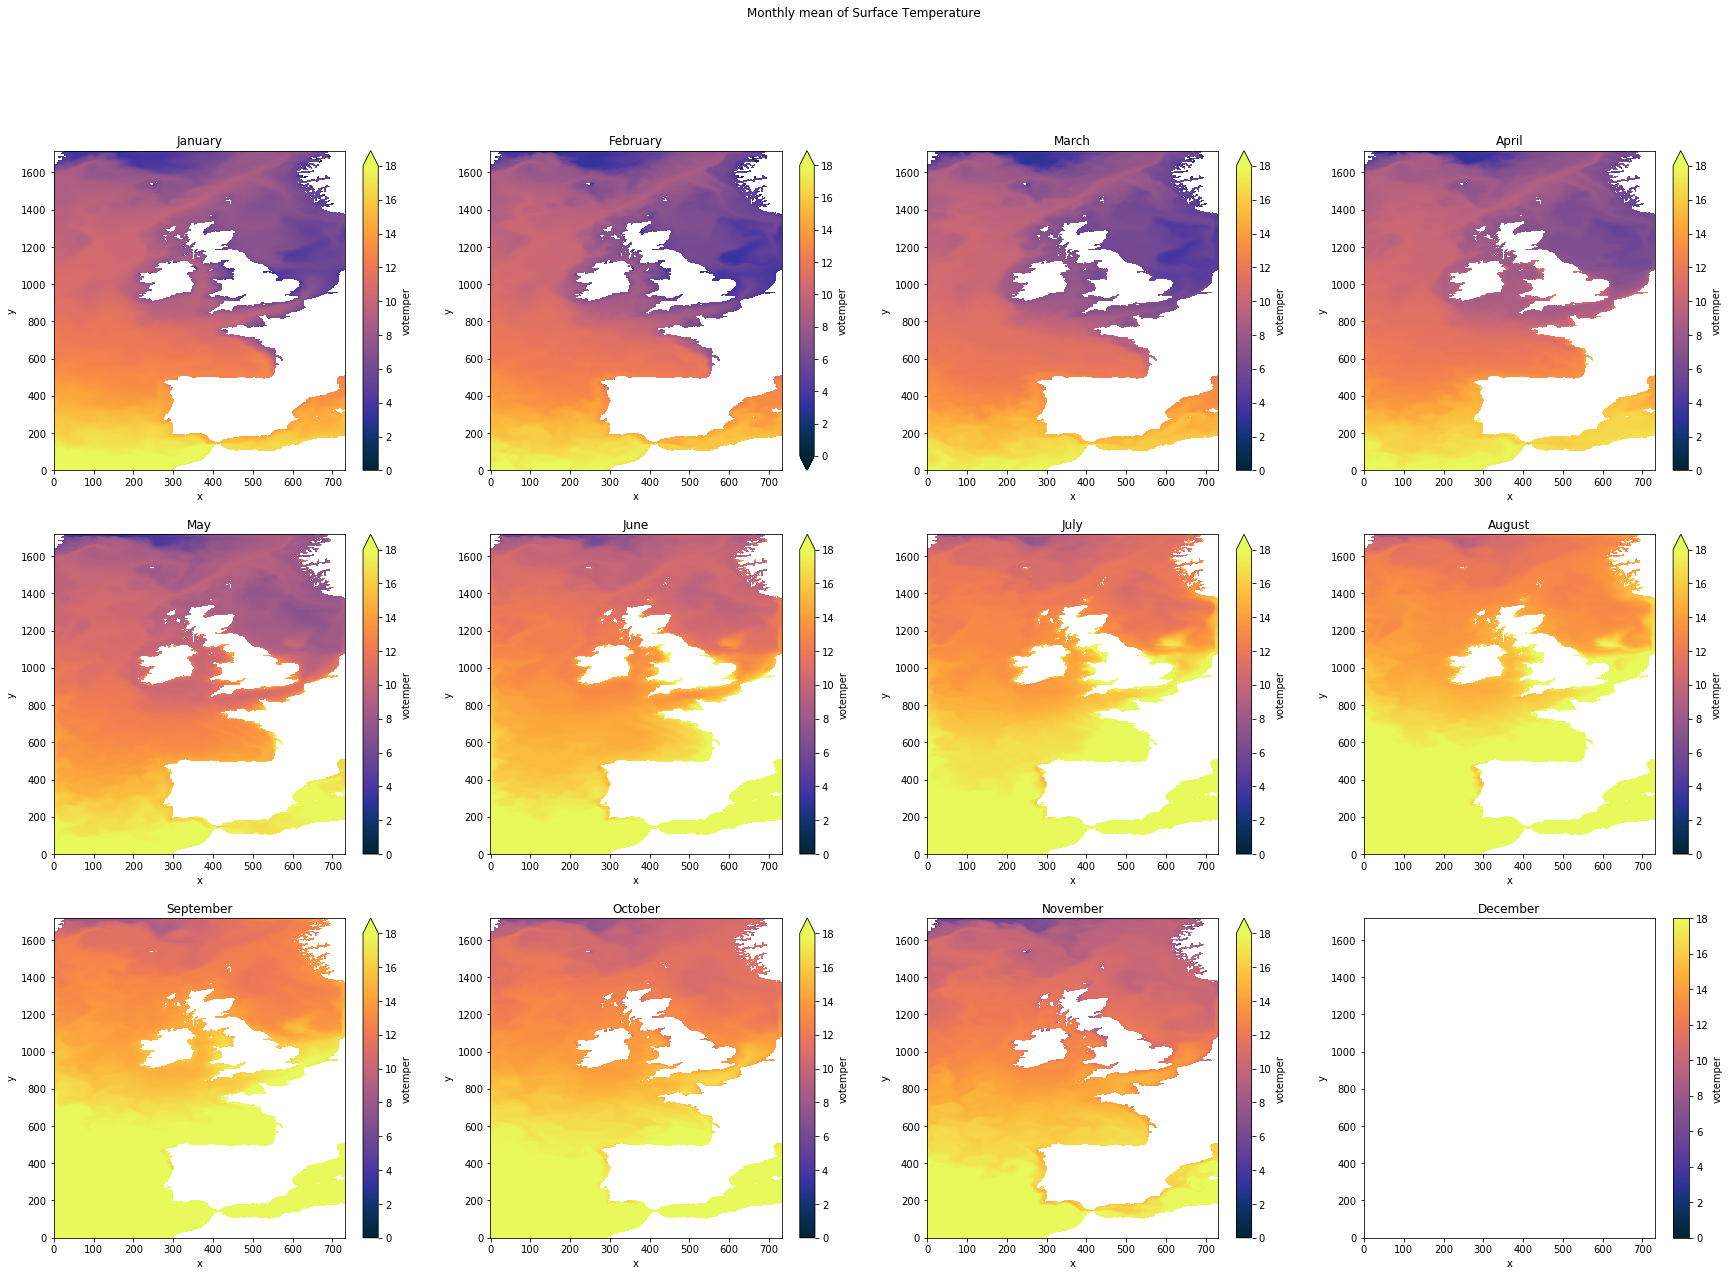

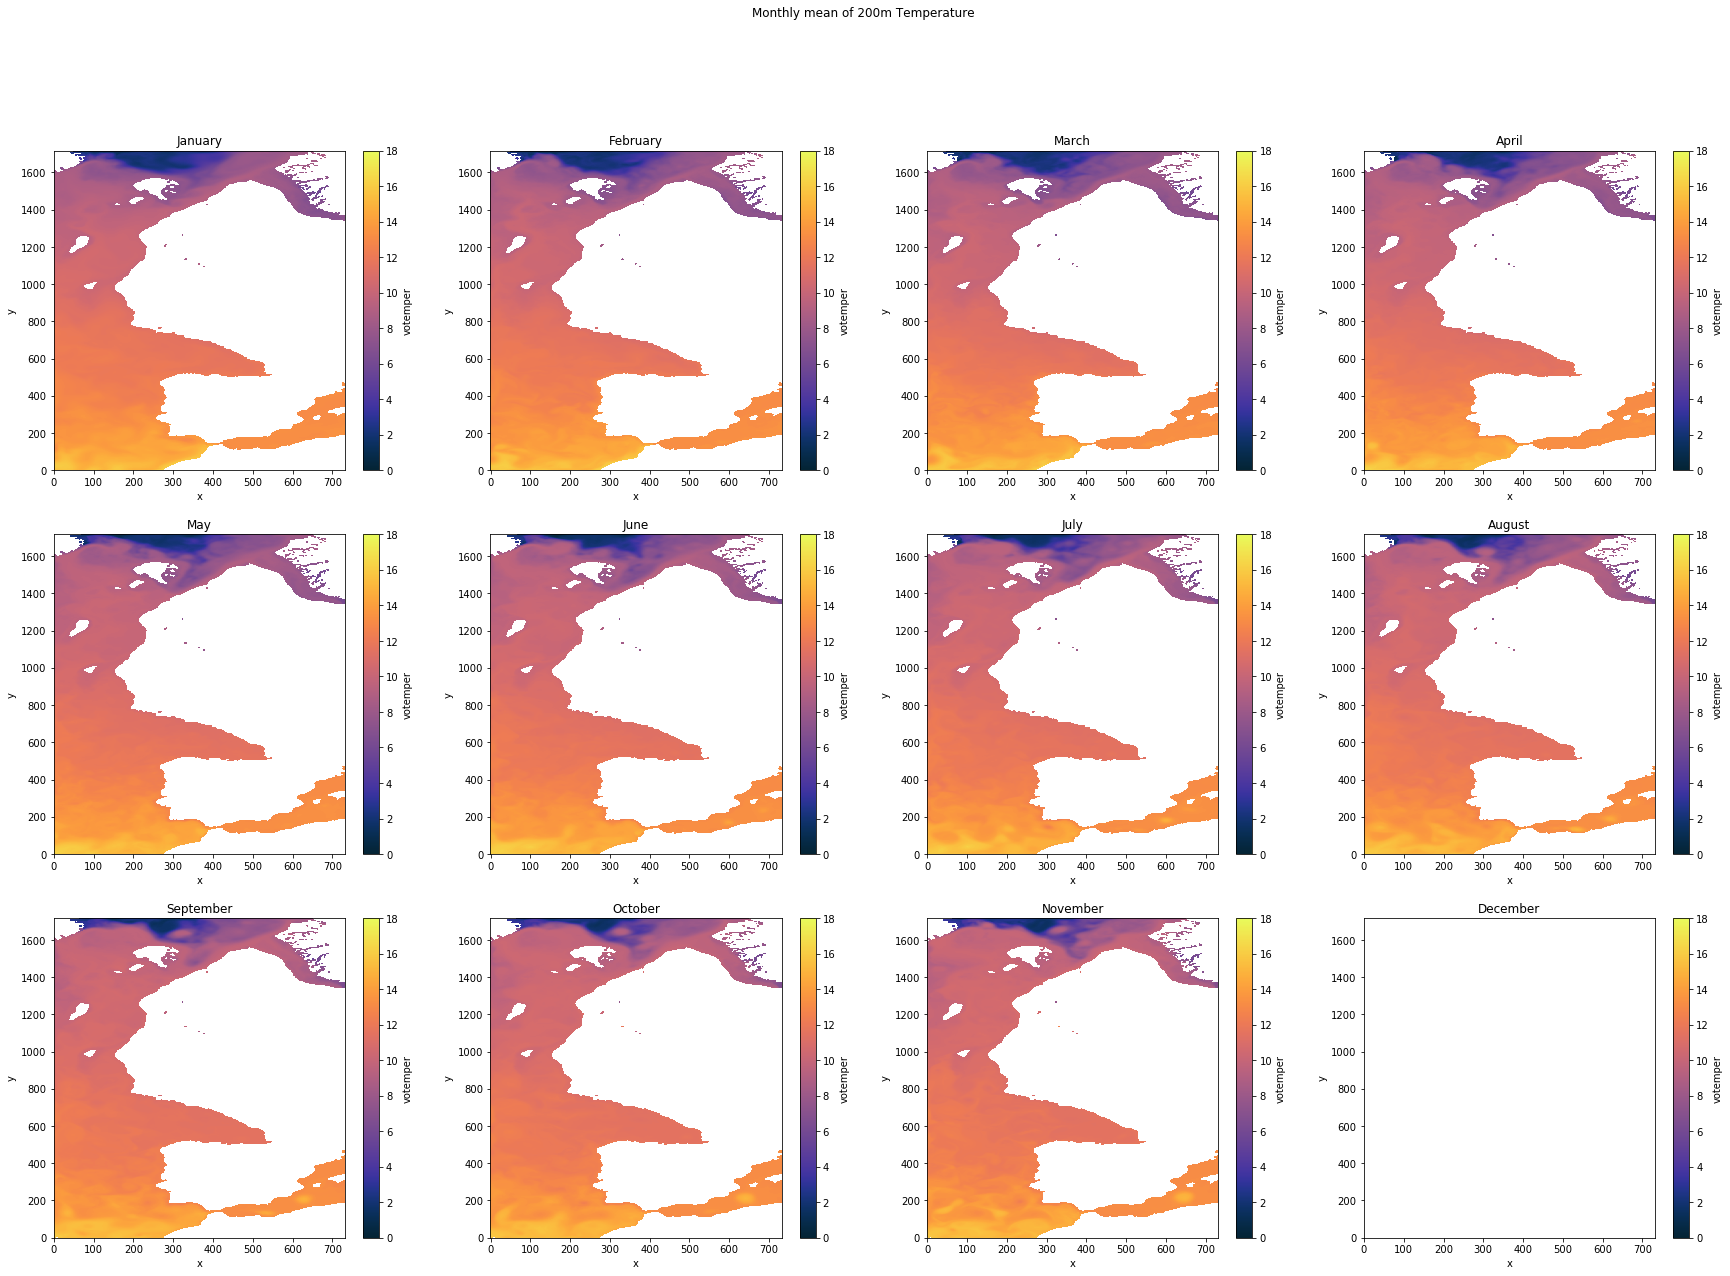

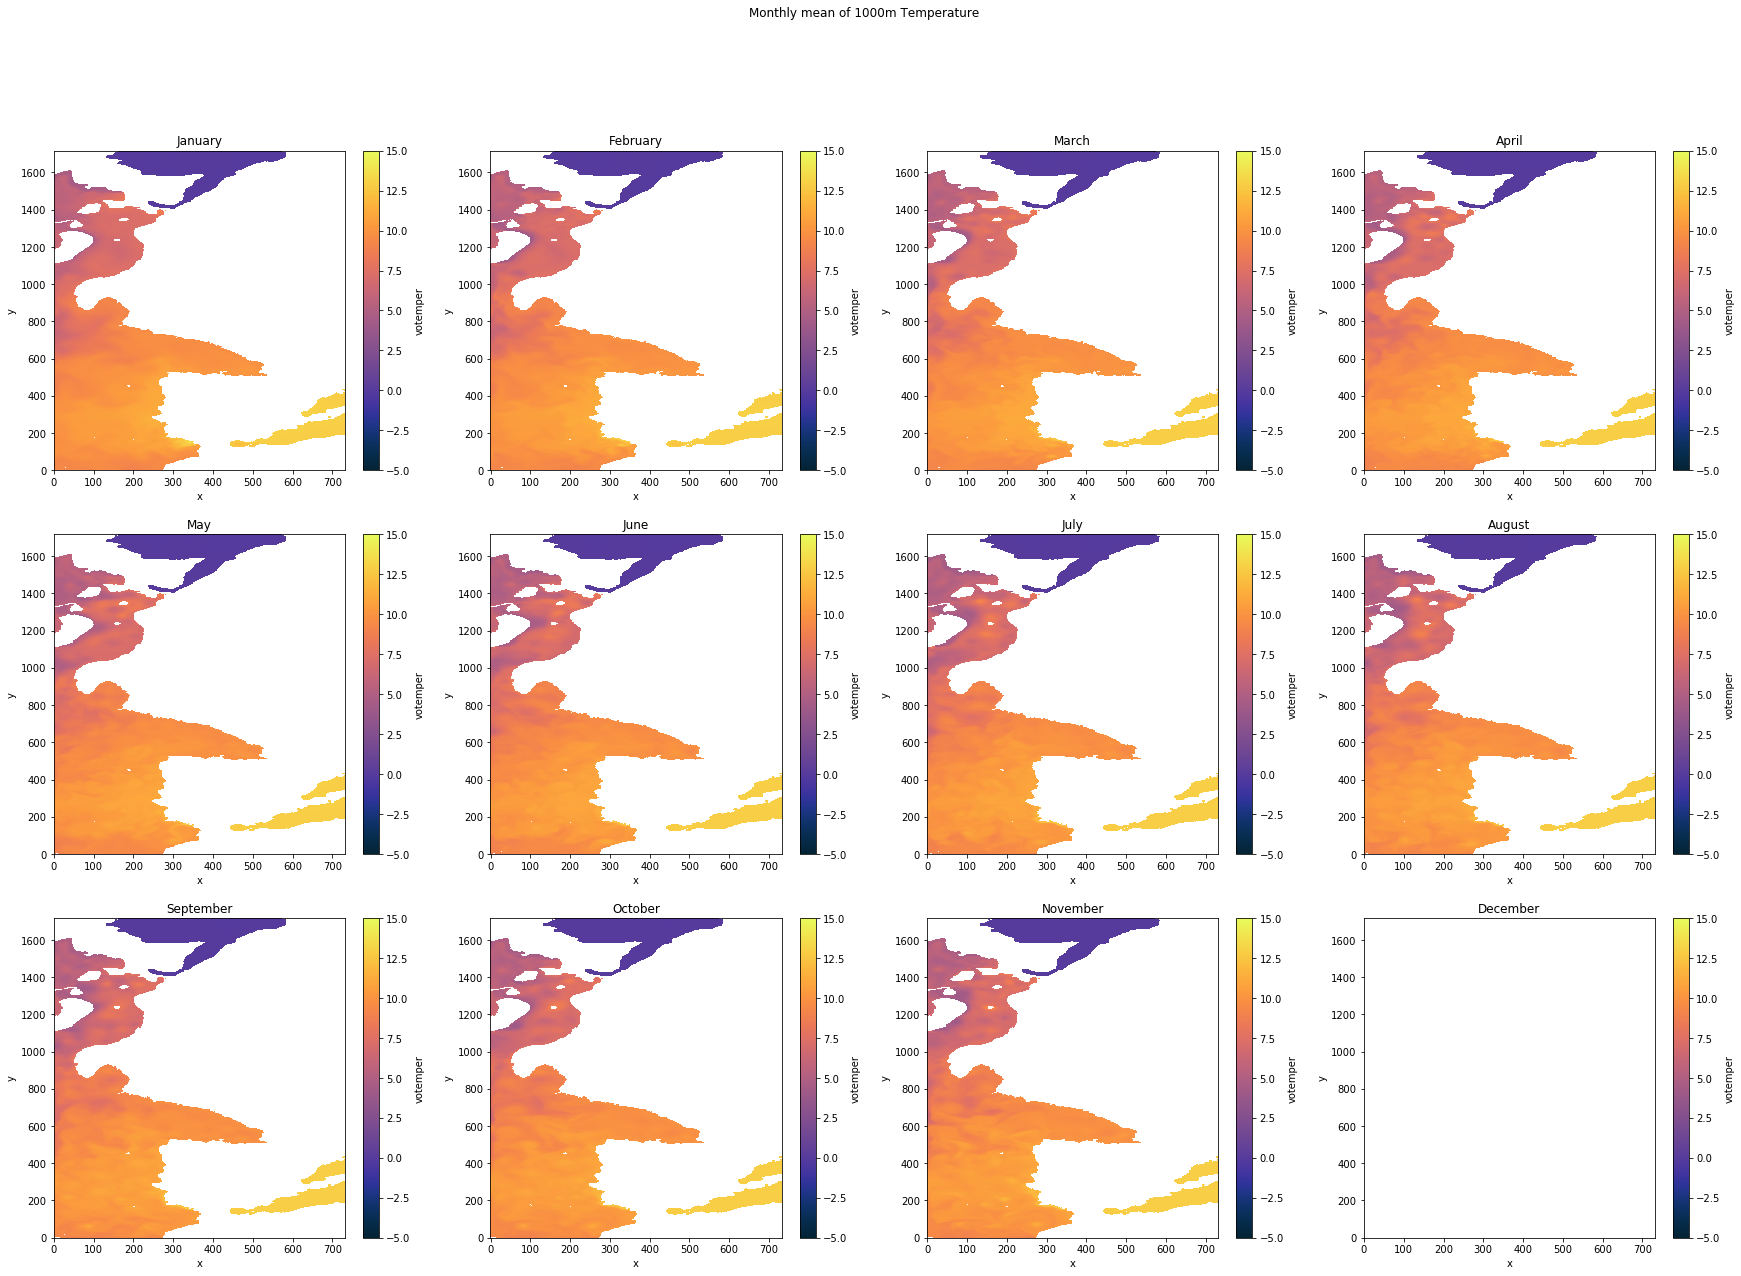

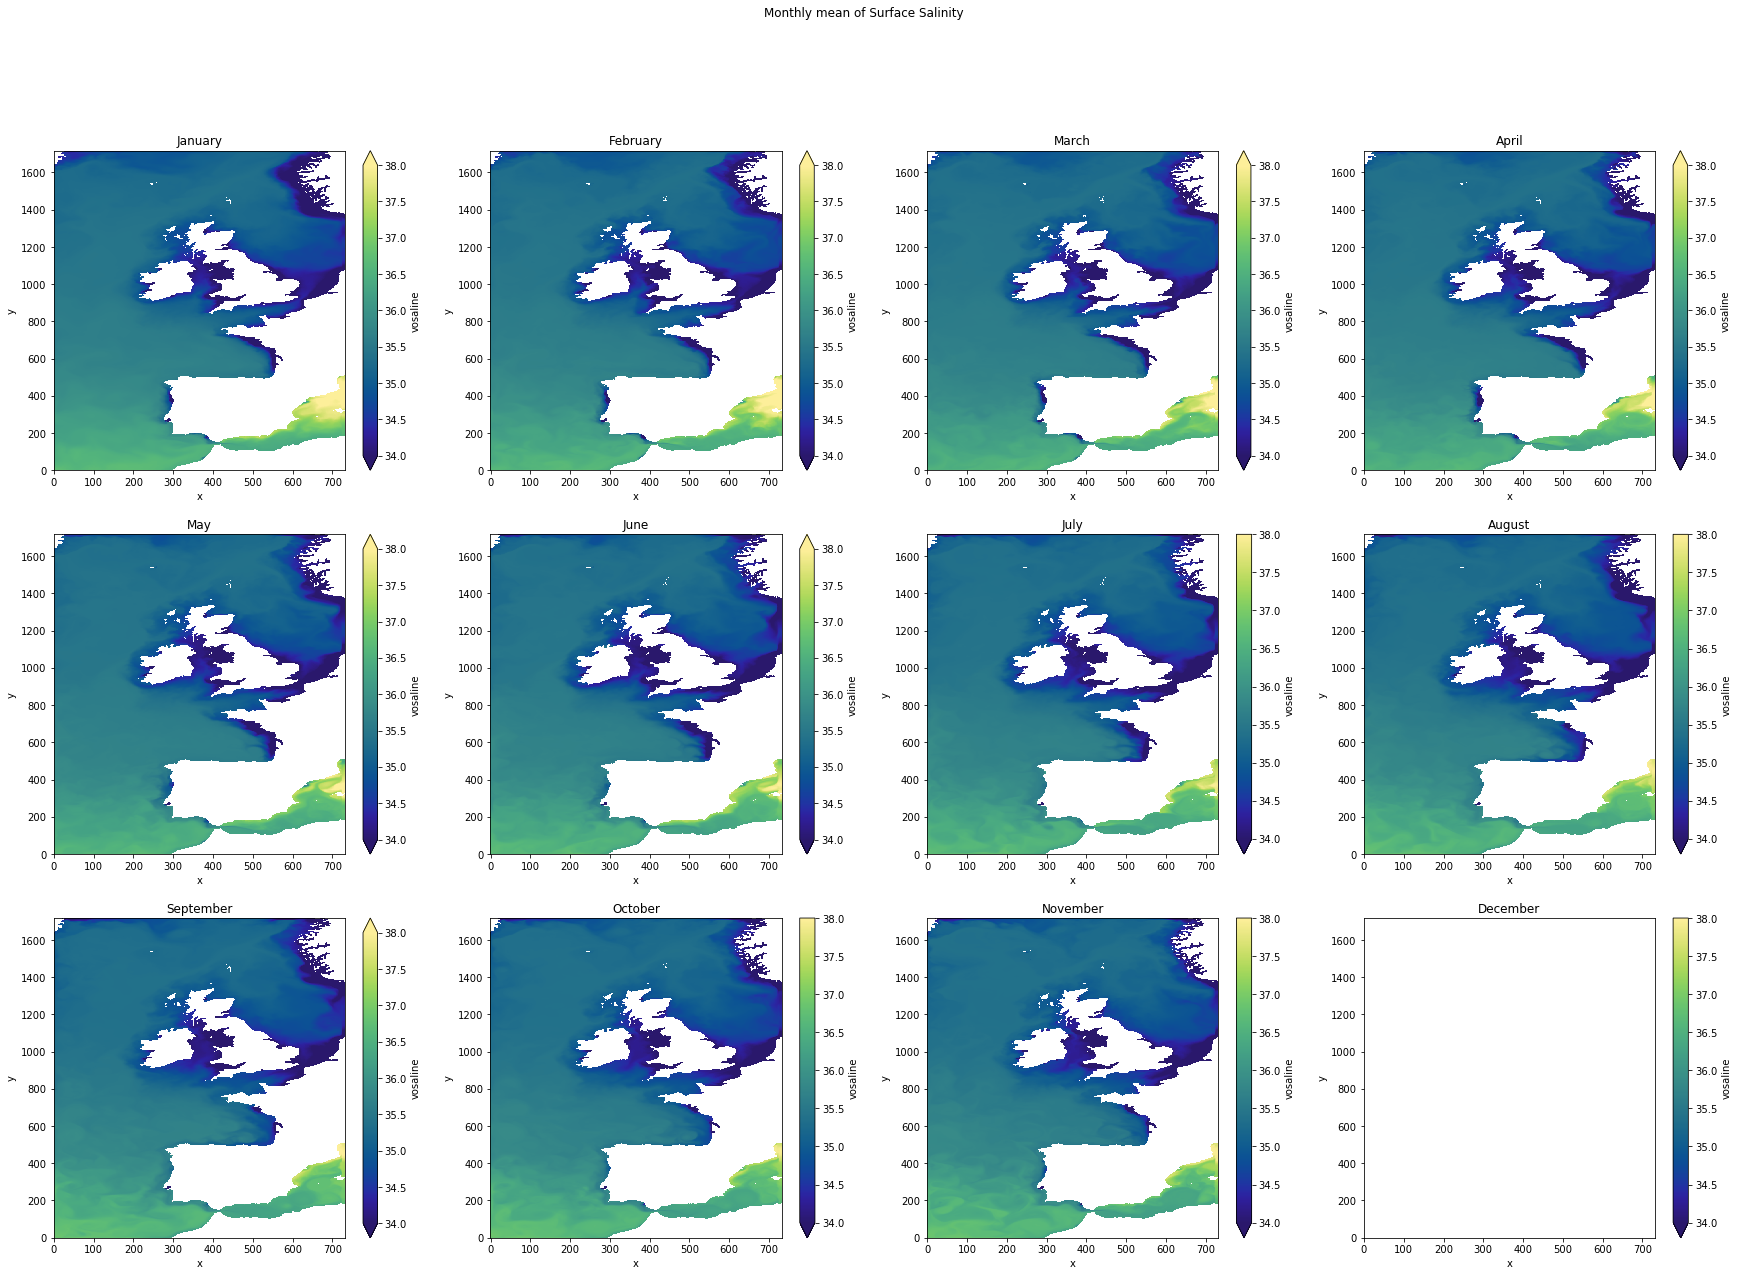

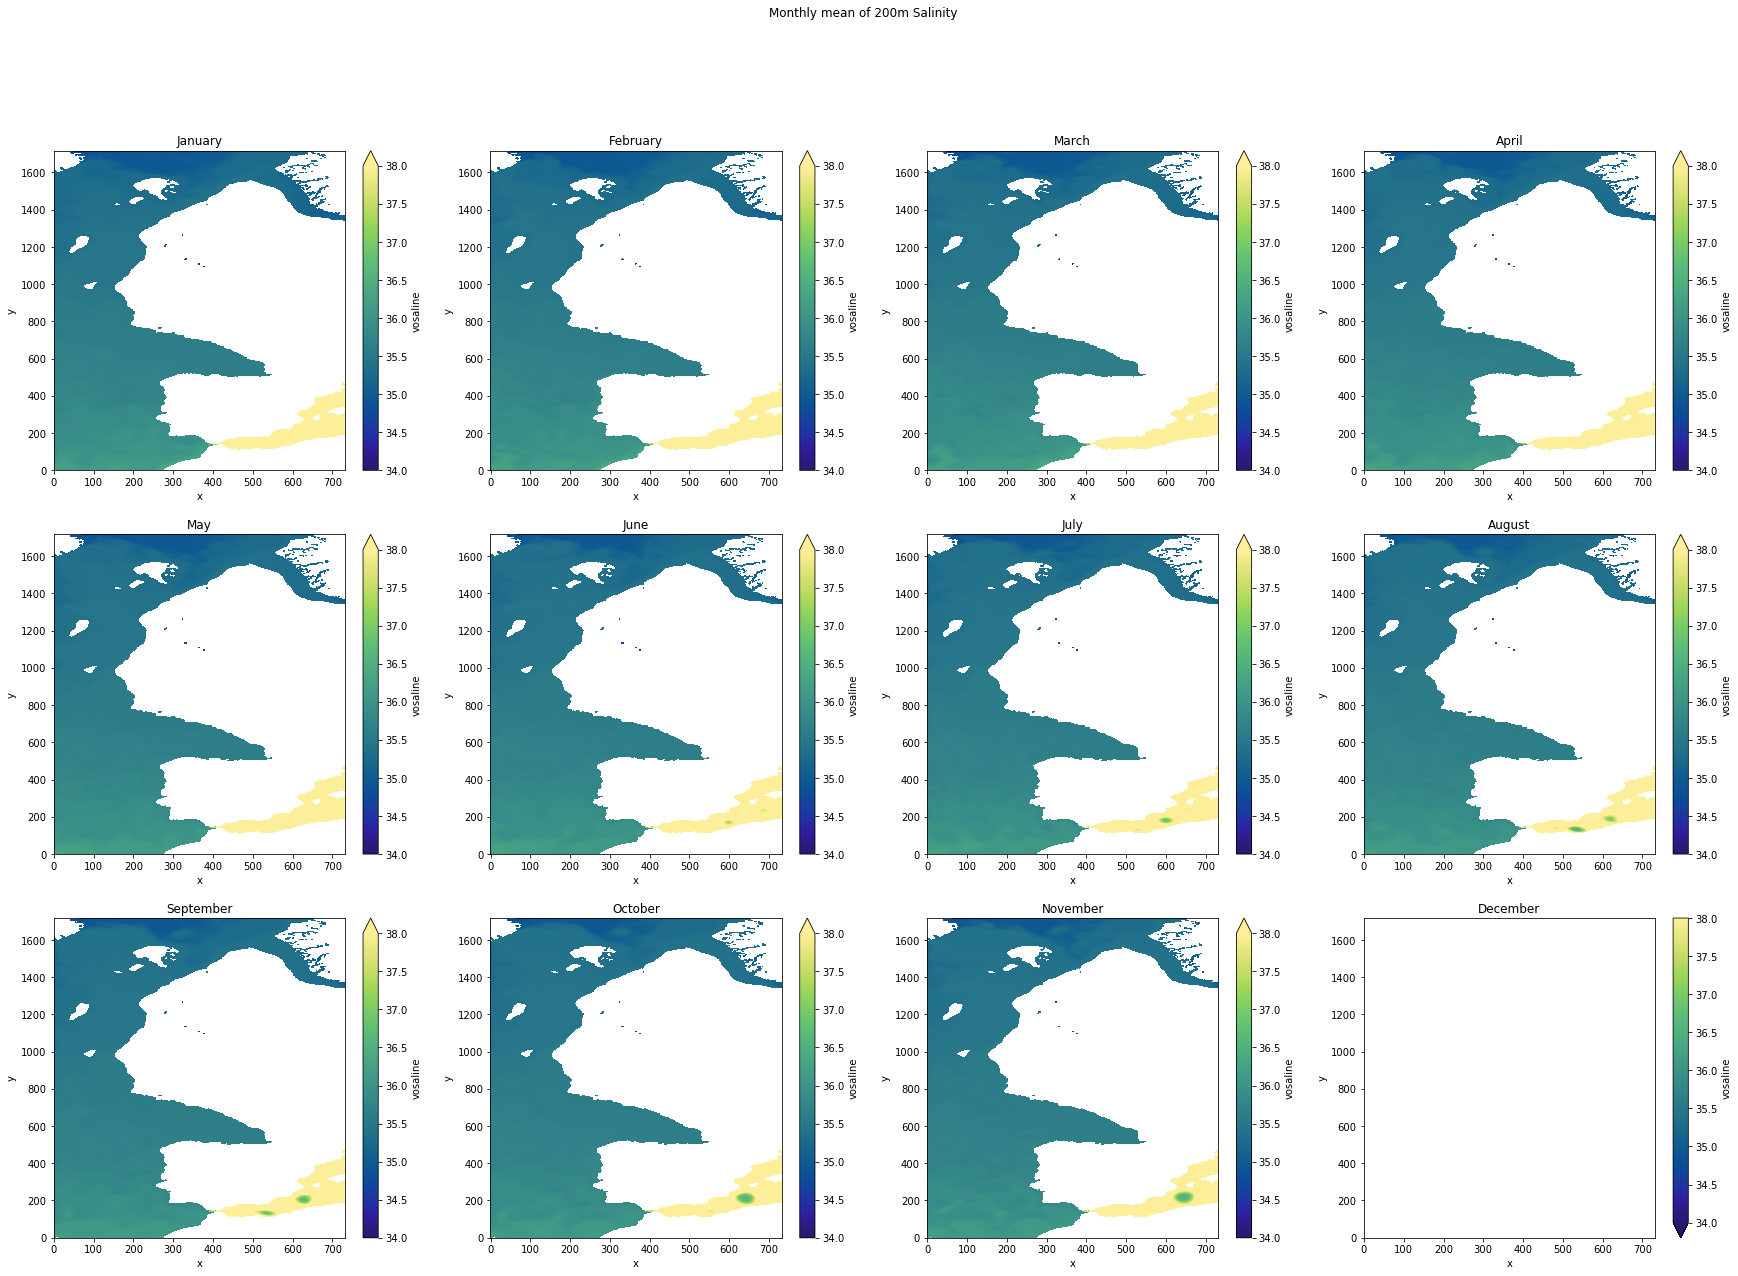

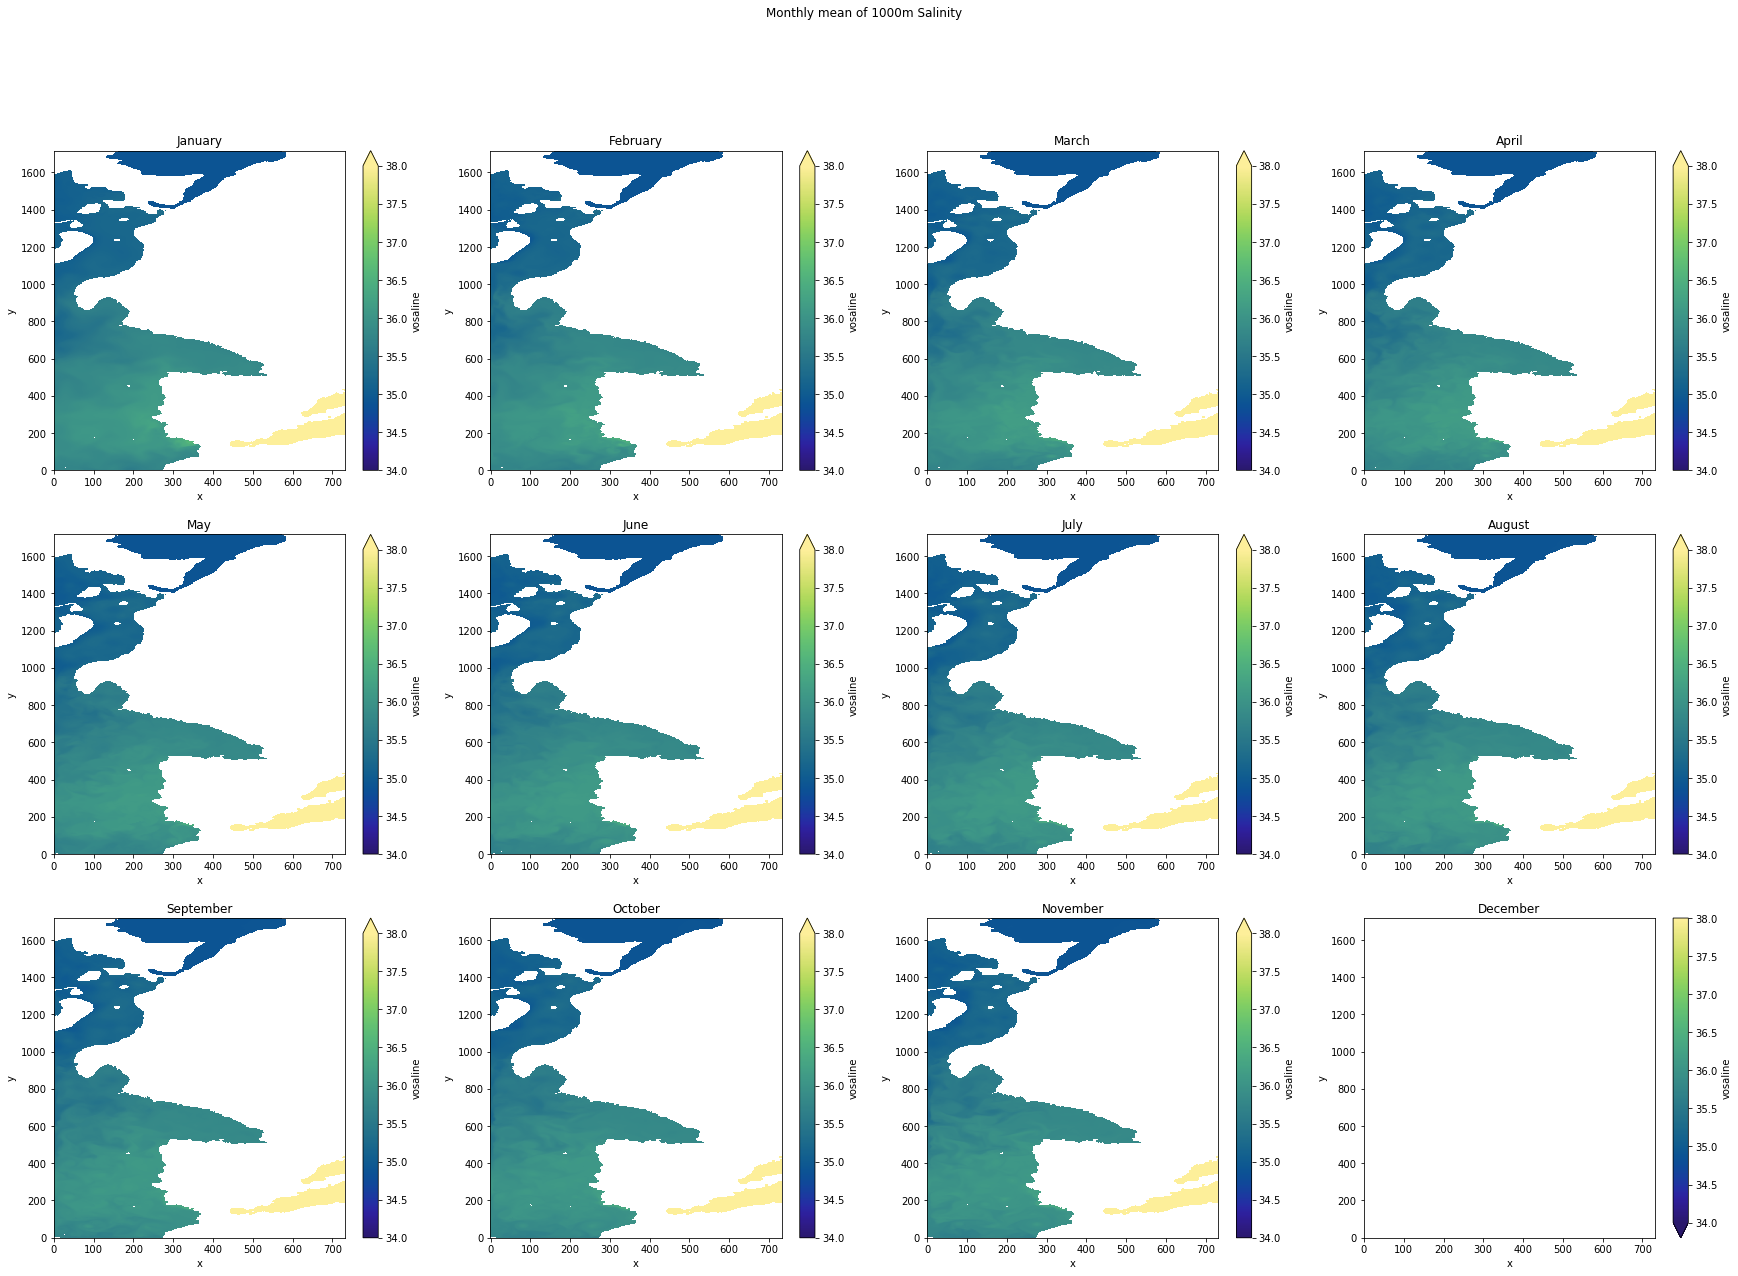

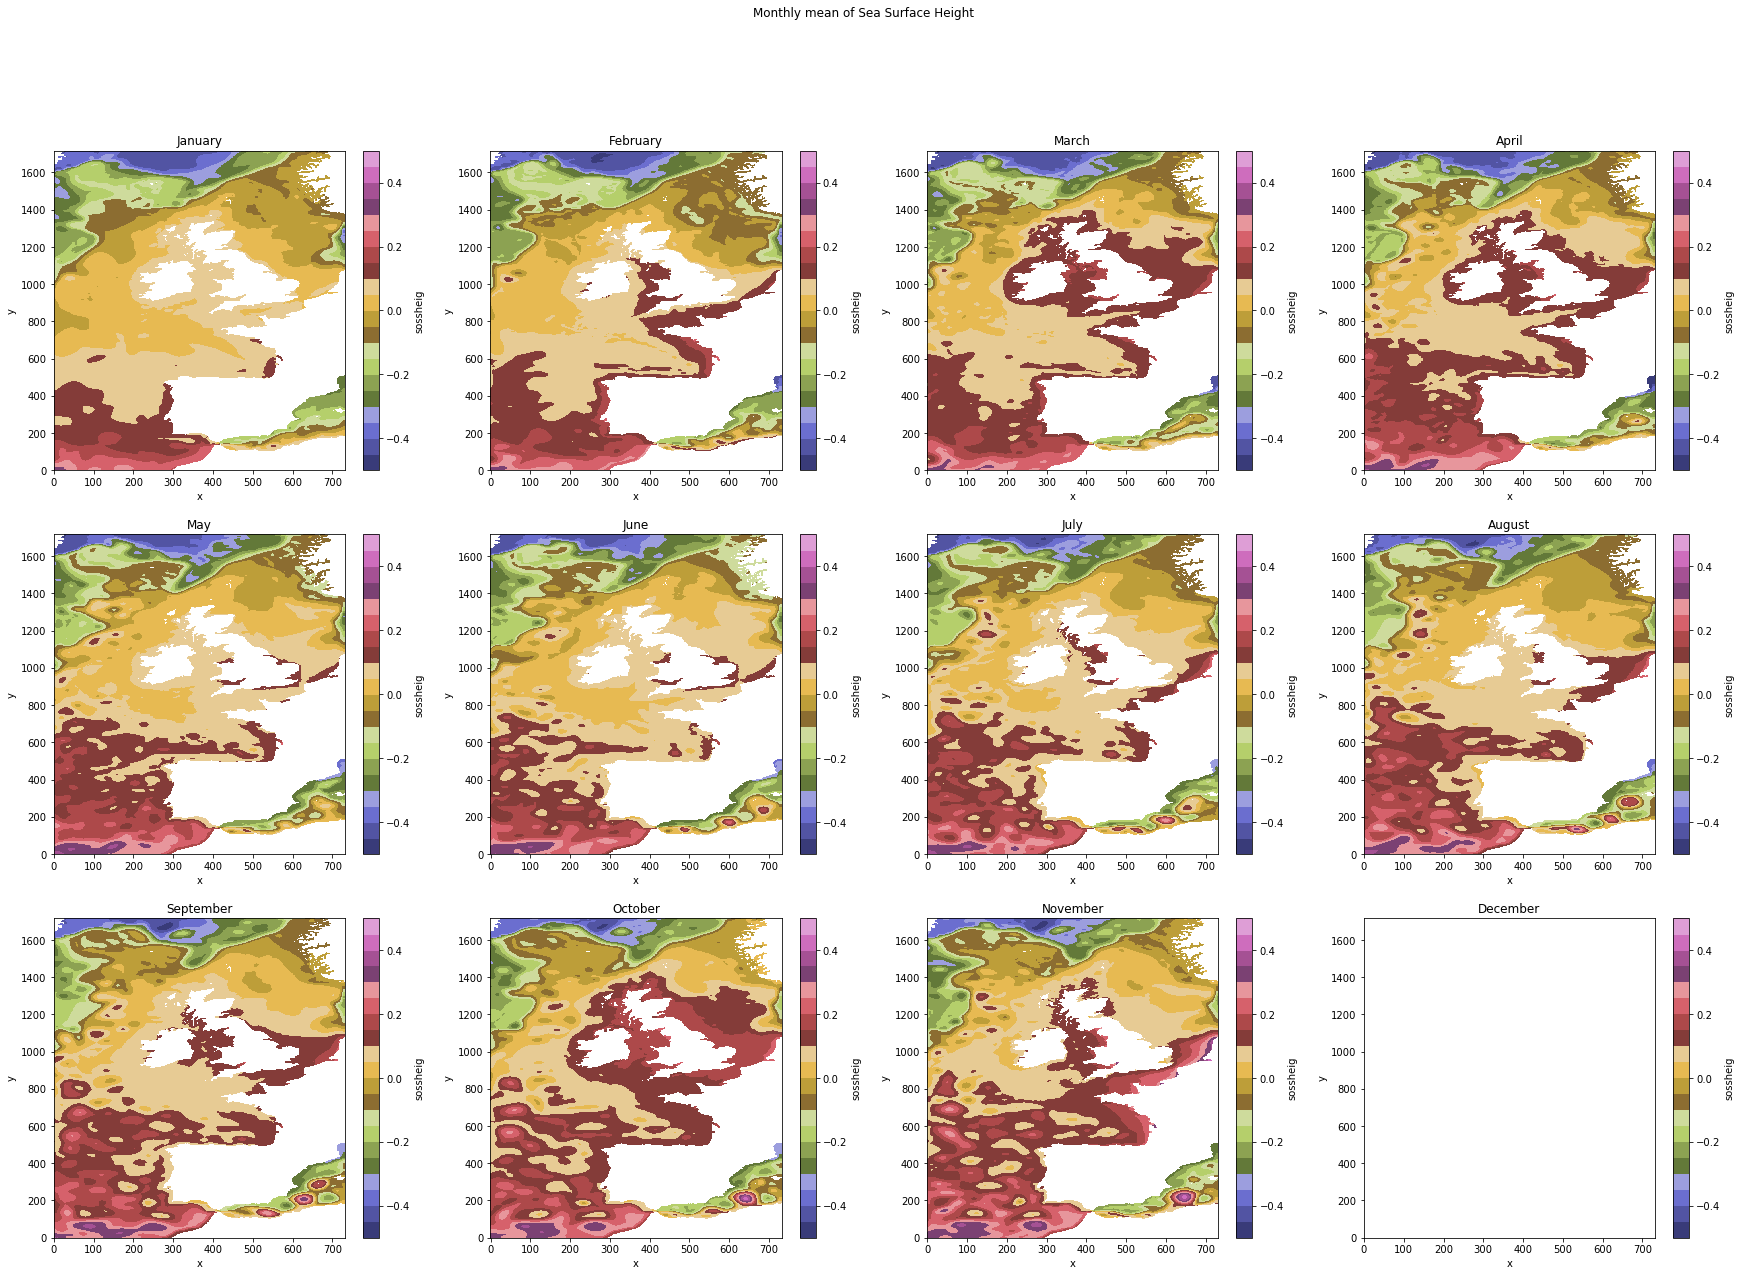

In [8]:
if tous_les_plots_gridT == True:
    filesT=sorted(glob.glob(datadir+'/'+str(config)+'-'+str(case)+'_y'+str(year)+'m??d??.'+str(freq)+'_gridT.nc'))
    dsT=xr.open_mfdataset(filesT)
    maskT=dsmask.tmask[0]
    tem=dsT.votemper
    plot_monthly(tem[:,0],maskT[0],0,18,'cmo.thermal','Surface Temperature','temp_surf')
    depT=dsT.deptht
    ind200=np.min(np.where(dsT.deptht>200)[0])
    plot_monthly(tem[:,ind200],maskT[ind200],0,18,'cmo.thermal','200m Temperature','temp_200m')
    ind1000=np.min(np.where(dsT.deptht>1000)[0])
    plot_monthly(tem[:,ind1000],maskT[ind1000],-5,15,'cmo.thermal','1000m Temperature','temp_1000m')
    sal=dsT.vosaline
    plot_monthly(sal[:,0],maskT[0],34,38,'cmo.haline','Surface Salinity','salt_surf')
    ind200=np.min(np.where(dsT.deptht>200)[0])
    plot_monthly(sal[:,ind200],maskT[ind200],34,38,'cmo.haline','200m Salinity','salt_200m')
    ind1000=np.min(np.where(dsT.deptht>1000)[0])
    plot_monthly(sal[:,ind1000],maskT[ind1000],34,38,'cmo.haline','1000m Salinity','salt_1000m')
    ssh=dsT.sossheig
    plot_monthly(ssh,maskT[0],-0.5,0.5,'tab20b','Sea Surface Height','ssh')
        

    

In [9]:
filesT=sorted(glob.glob(datadir+'/'+str(config)+'-'+str(case)+'_y'+str(year)+'m??d??.'+str(freq)+'_gridT.nc'))
print(datadir)

/scratch/cnt0024/hmg2840/colombo/EU36/EU36-MPC001-S/1d/2010/


In [10]:
!ls /scratch/cnt0024/hmg2840/colombo/EU36/EU36-MPC001-S/1d/2010

EU36-MPC001_y2010m01d01.1d_flxT.nc     EU36-MPC001_y2010m06d08.1d_gridV.nc
EU36-MPC001_y2010m01d01.1d_gridT.nc    EU36-MPC001_y2010m06d08.1d_gridW.nc
EU36-MPC001_y2010m01d01.1d_gridU.nc    EU36-MPC001_y2010m06d08.1d_icemod3.nc
EU36-MPC001_y2010m01d01.1d_gridV.nc    EU36-MPC001_y2010m06d09.1d_flxT.nc
EU36-MPC001_y2010m01d01.1d_gridW.nc    EU36-MPC001_y2010m06d09.1d_gridT.nc
EU36-MPC001_y2010m01d01.1d_icemod3.nc  EU36-MPC001_y2010m06d09.1d_gridU.nc
EU36-MPC001_y2010m01d02.1d_flxT.nc     EU36-MPC001_y2010m06d09.1d_gridV.nc
EU36-MPC001_y2010m01d02.1d_gridT.nc    EU36-MPC001_y2010m06d09.1d_gridW.nc
EU36-MPC001_y2010m01d02.1d_gridU.nc    EU36-MPC001_y2010m06d09.1d_icemod3.nc
EU36-MPC001_y2010m01d02.1d_gridV.nc    EU36-MPC001_y2010m06d10.1d_flxT.nc
EU36-MPC001_y2010m01d02.1d_gridW.nc    EU36-MPC001_y2010m06d10.1d_gridT.nc
EU36-MPC001_y2010m01d02.1d_icemod3.nc  EU36-MPC001_y2010m06d10.1d_gridU.nc
EU36-MPC001_y2010m01d03.1d_flxT.nc     EU36-MPC001_y2010m06d10.1d_gridV.nc
EU36-MPC001_y2010m01d03

distributed.nanny - WARNING - Worker process 14003 was killed by signal 11
distributed.nanny - WARNING - Restarting worker


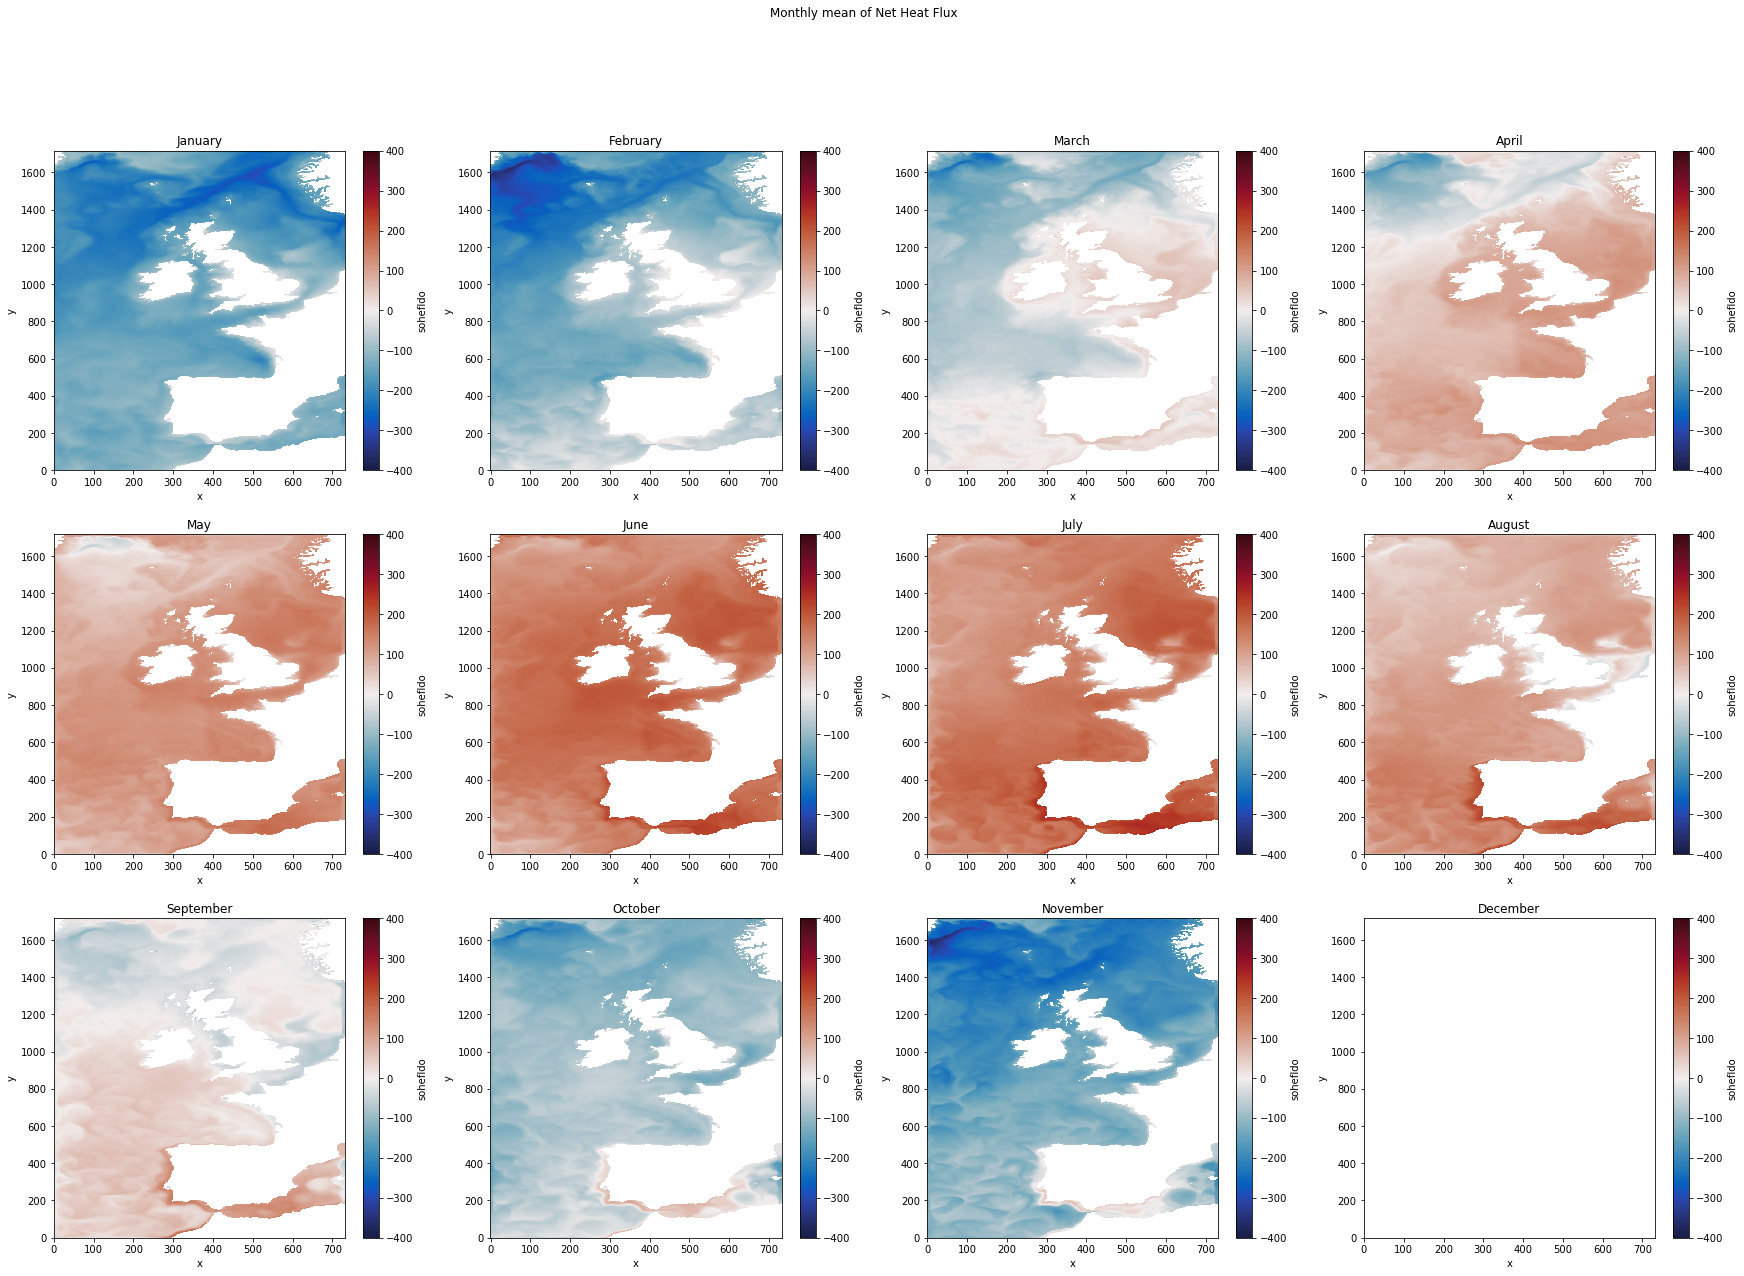

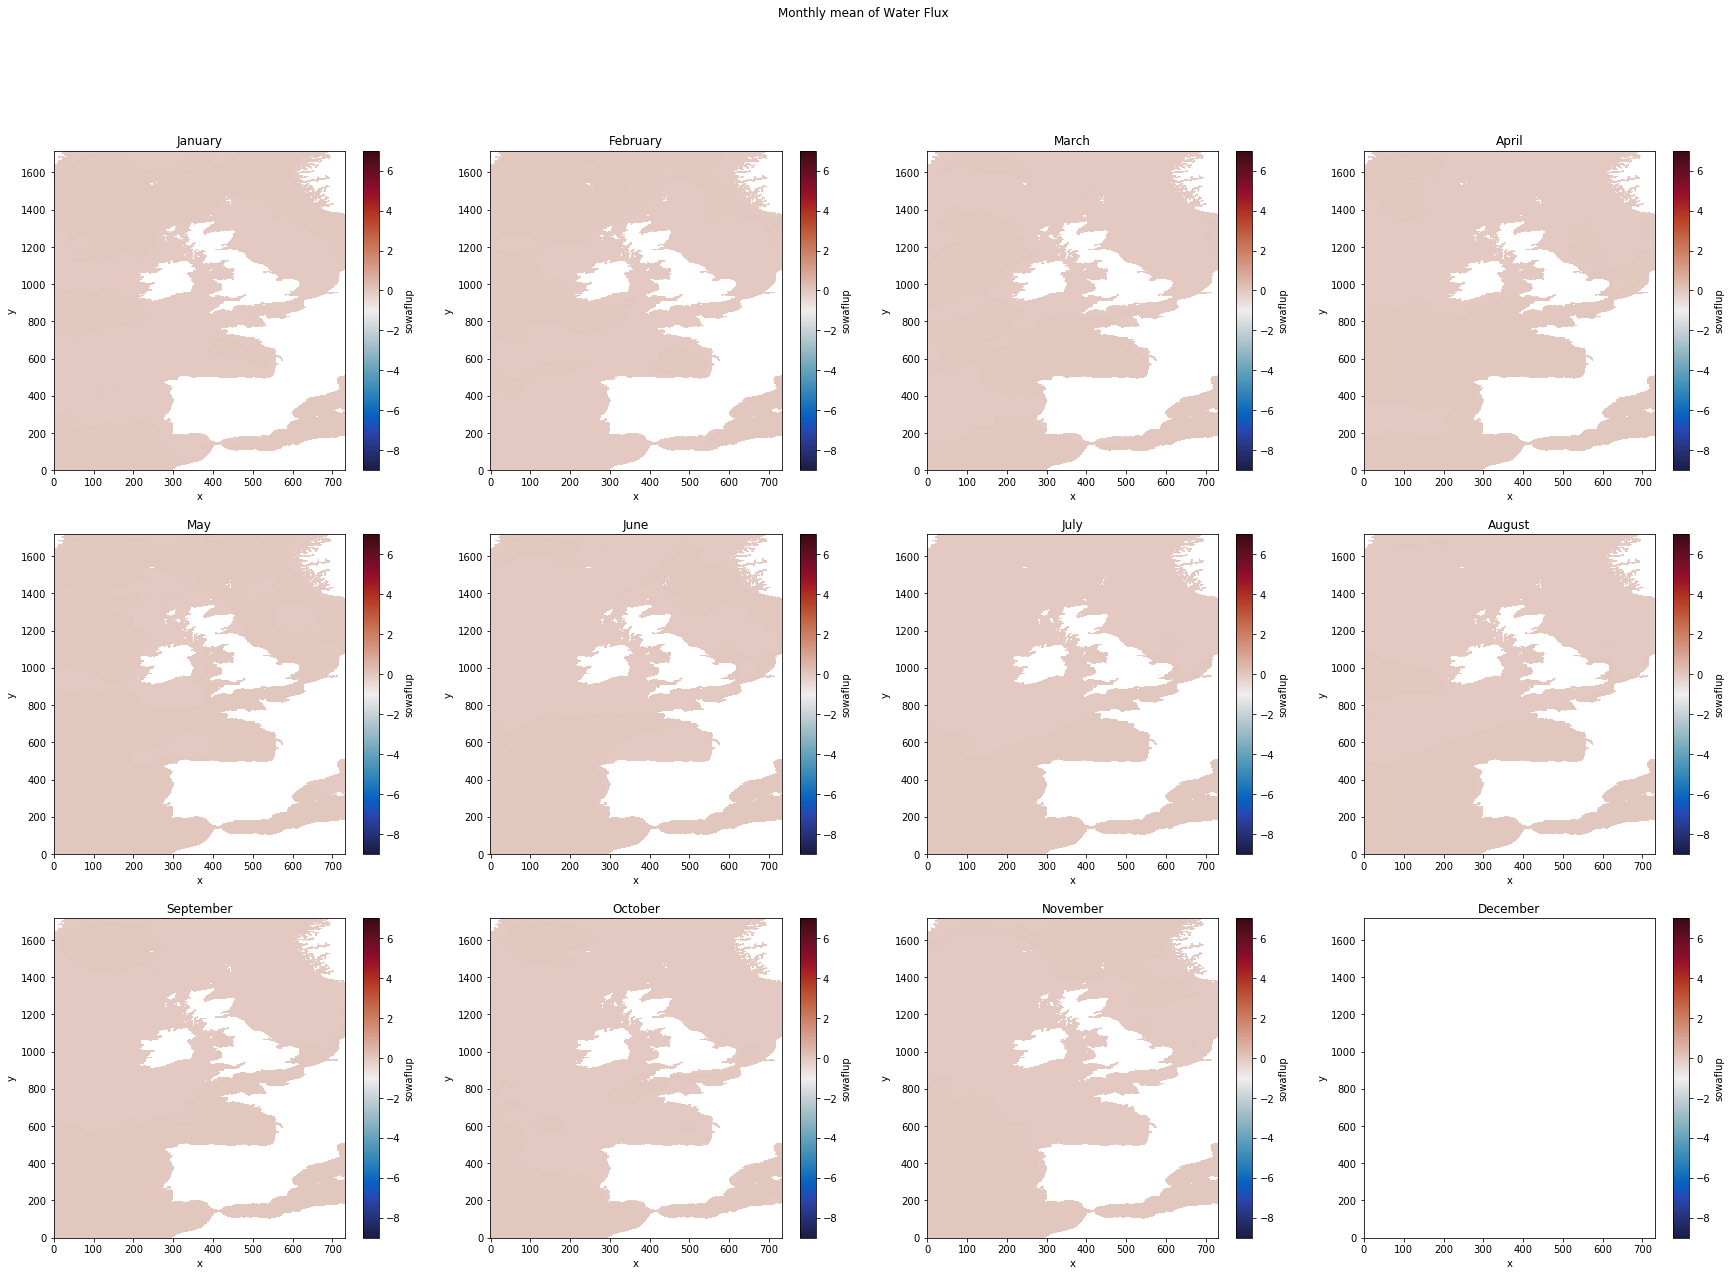

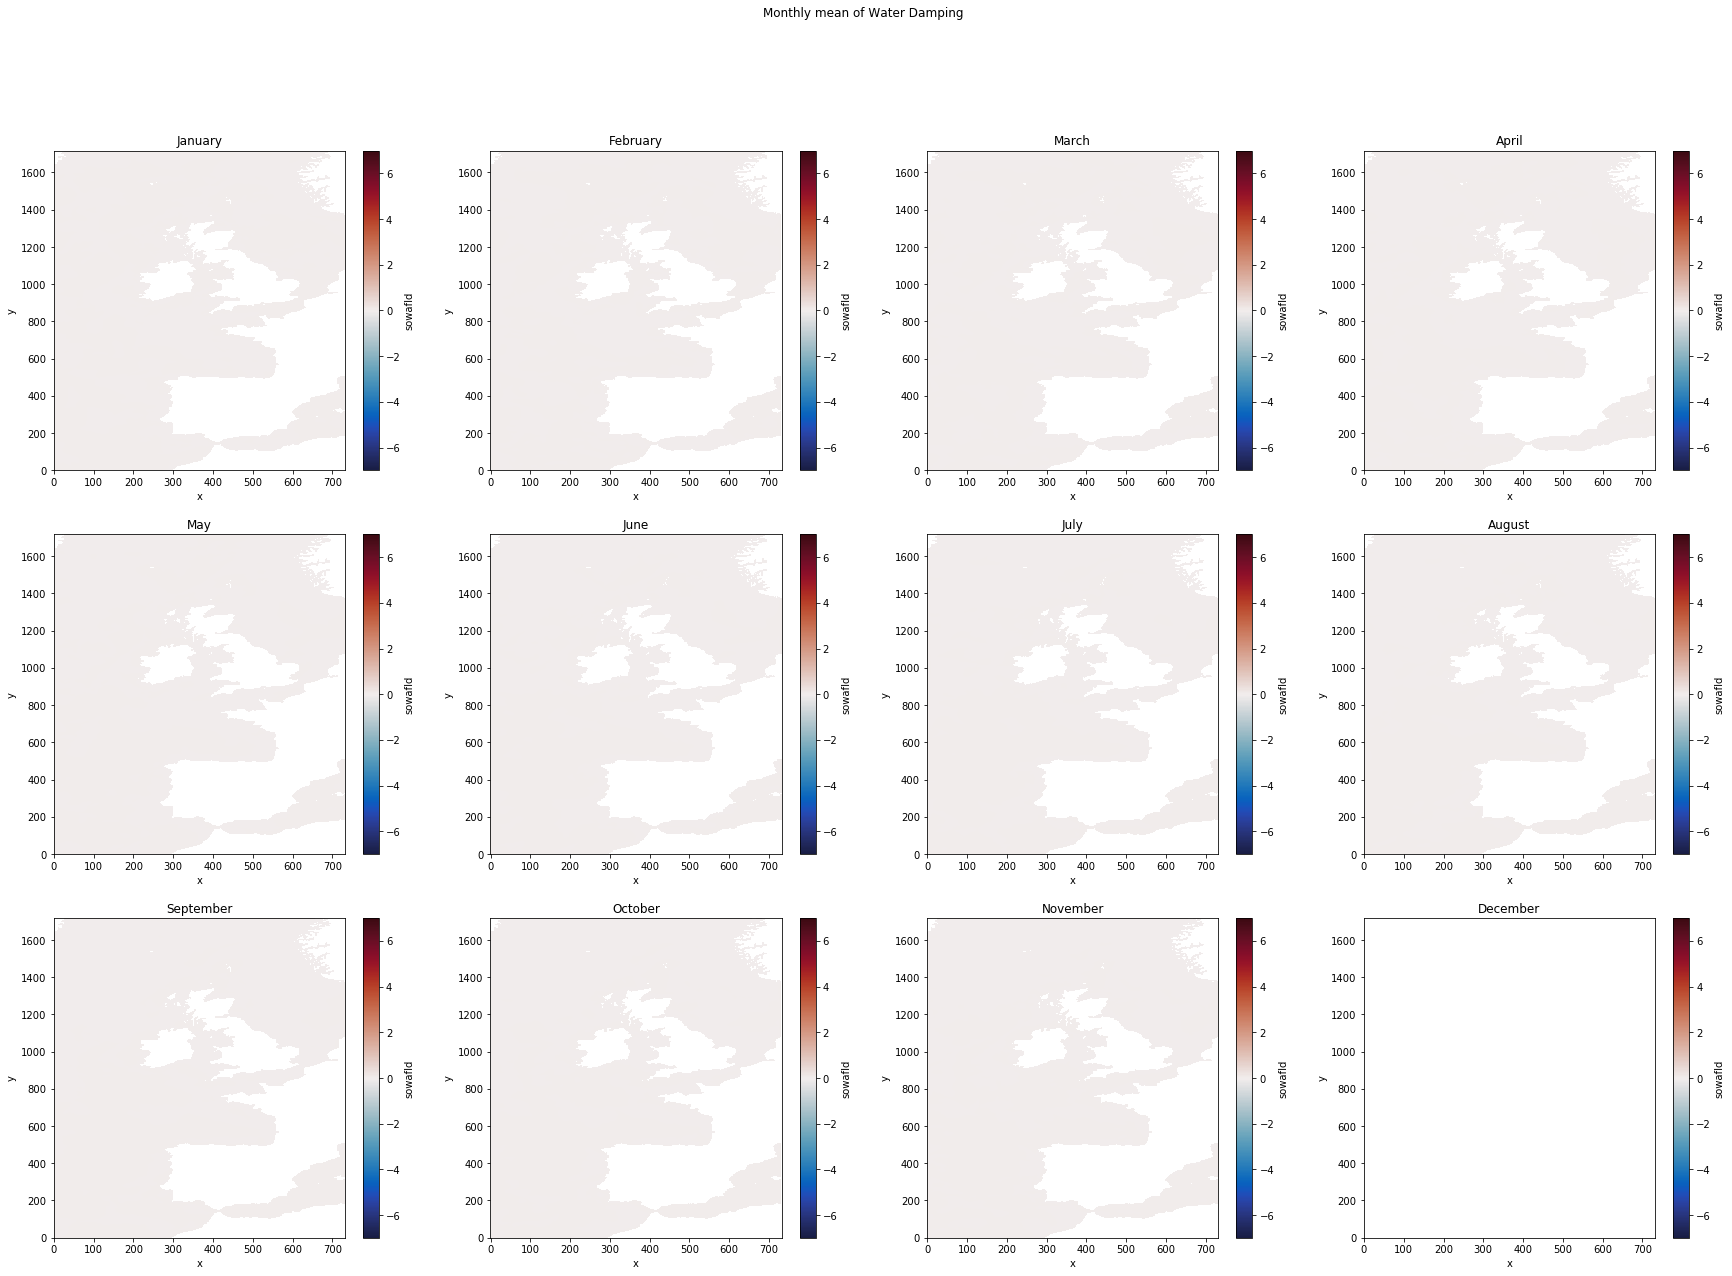

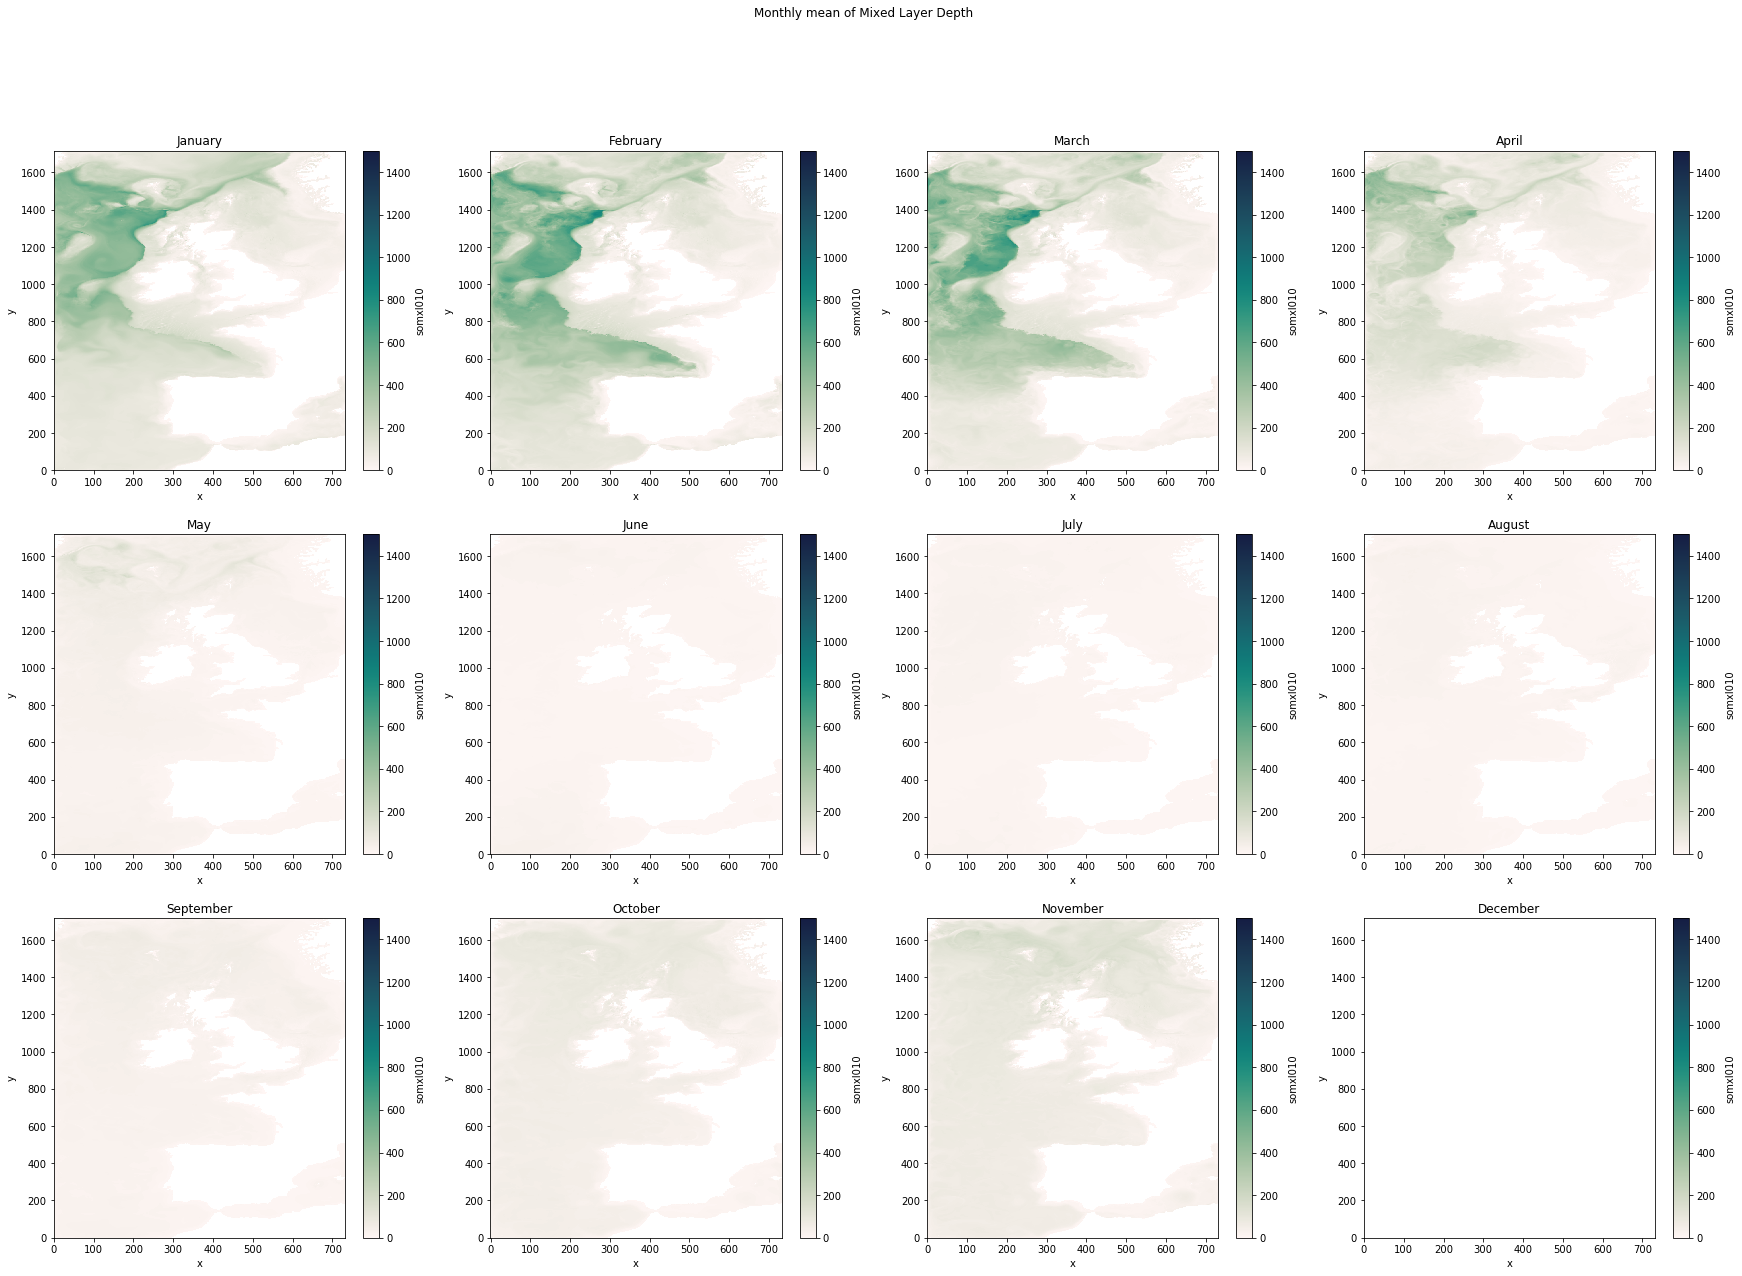

In [11]:
if tous_les_plots_flxT == True:
    filesflx=sorted(glob.glob(datadir+'/'+str(config)+'-'+str(case)+'_y'+str(year)+'m??d??.'+str(freq)+'_flxT.nc'))
    dsflx=xr.open_mfdataset(filesflx)
    maskT=dsmask.tmask[0]
    heat=dsflx.sohefldo
    plot_monthly(heat,maskT[0],-400,400,'cmo.balance','Net Heat Flux','heat_flux')
    waterflx=dsflx.sowaflup
    plot_monthly(waterflx,maskT[0],-9,7,'cmo.balance','Water Flux','water_flux')
    waterdmp=dsflx.sowafld
    plot_monthly(waterdmp,maskT[0],-7,7,'cmo.balance','Water Damping','water_damping')
    mxl=dsflx.somxl010
    plot_monthly(mxl,maskT[0],0,1500,'cmo.tempo','Mixed Layer Depth','mxl')
    